### Test: FAISS v/s BM25 + FAISS


## Load Data

### Load Train Dataset

In [ ]:
import csv
import requests

# load training dataset
def load_data():
    CSV_URL = 'https://drive.google.com/u/0/uc?id=1Z-yb752A3o7b9dqrGt24XU0sl53FVqya&export=download'

    with requests.Session() as s:
        download = s.get(CSV_URL)
        decoded_content = download.content.decode('utf-8')
        cr = csv.reader(decoded_content.splitlines(), delimiter=',')
        train_data = list(cr)

    print(f"Number of examples = {len(train_data)}")
    ans, noans = 0, 0
    for x in train_data:
        if x[4] == 'False':
            noans += 1
        else:
            ans += 1
    print(f"\tAnswerable questions = {ans}")
    print(f"\tNon-Answerable questions = {noans}\n")
    print("Examples:")
    for i in [0, 1000, 1300]:
        print(' | '.join(train_data[i][:2]), ' | ', train_data[i][2][:20] + '...', ' | ', ' | '.join(train_data[i][3:]))
    return train_data

In [ ]:
def load_theme_wise_data(train_data):
    theme_wise_data = {}
    for x in train_data[1:]:
        if x[1] not in theme_wise_data:
            theme_wise_data[x[1]] = {
                'para': [],
                'ques': [],
                'ans': []
            }
        if x[2] not in theme_wise_data[x[1]]['para']:
            theme_wise_data[x[1]]['para'].append(x[2])
        theme_wise_data[x[1]]['ques'].append(x[3])
        # ans contains a list -> [Para_Number, Answer_possible, Answer_text, Answer_start]
        theme_wise_data[x[1]]['ans'].append([theme_wise_data[x[1]]['para'].index(x[2])] + x[4:])
    print(f'\nTotal {len(theme_wise_data)} themes present.')
    return theme_wise_data

In [ ]:
! wget  'https://juggernautjha.gitlab.io/assets/interiit/train_data.csv'

--2023-01-30 17:14:56--  https://juggernautjha.gitlab.io/assets/interiit/train_data.csv
Resolving juggernautjha.gitlab.io (juggernautjha.gitlab.io)... 35.185.44.232
Connecting to juggernautjha.gitlab.io (juggernautjha.gitlab.io)|35.185.44.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65646492 (63M) [text/csv]
Saving to: ‘train_data.csv’

train_data.csv      100%[===================>]  62.60M  13.0MB/s    in 6.6s    

2023-01-30 17:15:03 (9.51 MB/s) - ‘train_data.csv’ saved [65646492/65646492]



In [ ]:
! wget 'https://juggernautjha.gitlab.io/assets/interiit-utils/train-data.csv'

--2023-01-30 17:13:31--  https://juggernautjha.gitlab.io/assets/interiit-utils/train-data.csv
Resolving juggernautjha.gitlab.io (juggernautjha.gitlab.io)... 35.185.44.232
Connecting to juggernautjha.gitlab.io (juggernautjha.gitlab.io)|35.185.44.232|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://projects.gitlab.io/auth?domain=https://juggernautjha.gitlab.io&state=EFUSHL0BJHIaC5-9EEZX9w== [following]
--2023-01-30 17:13:32--  https://projects.gitlab.io/auth?domain=https://juggernautjha.gitlab.io&state=EFUSHL0BJHIaC5-9EEZX9w==
Resolving projects.gitlab.io (projects.gitlab.io)... 35.185.44.232
Connecting to projects.gitlab.io (projects.gitlab.io)|35.185.44.232|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gitlab.com/oauth/authorize?client_id=5059a88907e1b093c23df47d996183b101a862a5e53e099b563120d1308db2c1&redirect_uri=https://projects.gitlab.io/auth&response_type=code&state=EFUSHL0BJHIaC5-9EEZX9w==&scope=api [f

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('train_data.csv')

In [ ]:
themes = clusters[2][20]

In [ ]:
my_df = df[df['Theme'].isin(themes)]

In [ ]:
my_df

,Unnamed: 0,Theme,Paragraph,Question,Answer_possible,Answer_text,Answer_start
11371,21074,Bern,"The city of Bern or Berne (German: Bern, prono...",Where is Bern located?,True,['Switzerland'],[213]
11372,21075,Bern,"The city of Bern or Berne (German: Bern, prono...",How many municiplaities are in Bern?,True,['36'],[455]
11373,21076,Bern,"The city of Bern or Berne (German: Bern, prono...",Bern is the capitol of which canton?,True,['Canton of Bern'],[602]
11374,21078,Bern,The official language of Bern is (the Swiss va...,What is the official language of Bern?,True,['German'],[65]
11375,21080,Bern,In 1983 the historic old town in the centre of...,Where does Bern rank for top cities for the be...,True,['top ten'],[122]
...,...,...,...,...,...,...,...
68843,120614,Red,After the Communist Party of China took power ...,What does the red color in the Nepalese flag r...,True,['the national flower'],[665]
68844,120615,Red,After the Communist Party of China took power ...,In what year during the 20th century did the C...,True,['1949'],[49]
68845,120616,Red,After the Communist Party of China took power ...,Which group gained power in China in 1949?,True,['the Communist Party of China'],[6]
68846,120618,Red,After the Communist Party of China took power ...,What flag symbolizing China was displayed in 1...,False,[],[]


In [ ]:
paras = list(my_df['Paragraph'].unique())

In [ ]:
ques = list(my_df['Question'])

In [ ]:
all_paras = list(my_df['Paragraph'])

In [ ]:
gold_para = [paras.index(all_paras[i]) for i in range(len(ques))]

## Task 1: Paragraph Retrieval

### Common Pipeline

In [ ]:
%%capture
!pip install transformers faiss-cpu
!pip install -U sentence-transformers

In [ ]:
from nltk import sent_tokenize
from transformers import AutoModel, AutoTokenizer
from sentence_transformers import SentenceTransformer

import faiss
import matplotlib.pyplot as plt
import nltk
import tensorflow as tf
import tensorflow_hub as hub
import torch

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def para_to_sentences(para):
    """Splits a para into sentences."""
    para = para.replace('\n', ' ').replace('\t', ' ').replace('\x00', ' ')
    return sent_tokenize(para)

def load_sents_from_para(paras):
    sents = []
    para_id = []
    for id, x in enumerate(paras):
        new_sents = para_to_sentences(x)
        sents += new_sents
        para_id += [id]*len(new_sents)
    return sents, para_id

In [ ]:
def load_encoder(encoder="universal-sentence-encoder-qa-v3"):
    """Load Google's Universal Sentence Encoder for QA"""
    if encoder == "universal-sentence-encoder-qa-v3":
        module_url = "https://tfhub.dev/google/universal-sentence-encoder-qa/3"
        model = hub.load(module_url)
    elif encoder == "mpnet-base-v2":
        model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
    elif encoder == "distilroberta-v1":
        model = SentenceTransformer('sentence-transformers/all-distilroberta-v1')
    elif encoder == "minilm-l12-v2":
        model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')
    else:
        raise "Unknown sentence encoder"
    return model


def get_embeddings_st(sents, model):
    return model.encode(sents)


def get_embeddings_guse(sents, paras, para_id, model, sents_type="Context"):
    """Calculate embeddings for given list of sentences based on its type
    i.e. either its a Question or a Context"""
    if sents_type == "Question":
        return model.signatures['question_encoder'](
            tf.constant(sents)
        )['outputs']
    else:
        contexts = [
            paras[para_id[i]]['paragraph'] for i in range(len(sents))
        ]
        return model.signatures['response_encoder'](
            input = tf.constant(sents),
            context = tf.constant(contexts)             # can play with this
        )['outputs']



def get_embeddings(encoder_name, sents, paras, para_id, model, sents_type="Context"):
    if encoder_name == "universal-sentence-encoder-qa-v3":
        return get_embeddings_guse(sents, paras, para_id, model, sents_type)
    elif encoder_name in ["mpnet-base-v2", "distilroberta-v1", "minilm-l12-v2"]:
        return get_embeddings_st(sents, model)
    else:
        raise "Unknown Sentence Encoder"
# def get_embeddings(sents, encoder, tokenizer, model, sents_type="default"):
#     if encoder == 'Universal Sentence Encoder':
#         return model(sents)
#     elif encoder == 'Universal Sentence Encoder for QA':
#         if sents_type == "Question":
#             return model.signatures['question_encoder'](tf.constant(sents))['outputs']
#         return model.signatures['response_encoder'](
#             input = tf.constant(sents),
#             context = tf.constant(sents)
#         )['outputs']
#     elif encoder == 'SimCSE':
#         tokens = tokenizer(sents, padding=True, truncation=True, return_tensors="pt")
#         with torch.no_grad():
#             embeds = model(**tokens, output_hidden_states=True, return_dict=True).pooler_output
#         return embeds
#     print("Encoder not found. Please choose one from - 1. Universal Sentence Encoder, 2. Universal Sentence Encoder for QA, 3. SimCSE")

In [ ]:
def get_k_nearest_neighbours(sents_embed, ques_embed, k = 10):
    index = faiss.IndexFlatL2(sents_embed.shape[1])
    index.add(sents_embed)
    return index.search(ques_embed, k)

def sent_id_to_para_id(I, para_id):
    return [[para_id[sent_idx] for sent_idx in I[i]] for i in range(len(I))]

In [ ]:
def print_example(i, sents, ques, pred_para, I, D):
    cur_ques = ques[i]
    print('question:', cur_ques)
    print('similar sentences:')
    print('\tTarget sentence | Predicted Para ID | Distance between target sentence and query')
    for j in range(D.shape[1]):
        target_sent = sents[I[i,j]]
        print('\t', target_sent, '|', pred_para[i][j], '|', D[i, j])

In [ ]:
def load_corpus_by_cluster(cluster, round):
  themes = clusters[round][cluster]
  paras = []; ques = []; gold_para = []; ans = [];
  for theme in themes:
    p, q, g, a = load_ques_by_theme(theme, theme_wise_data)
    paras.append(p)
    ques.append(q)
    gold_para.append(g)
    ans.append(a)
  return paras, ques, gold_para, ans

def return_coordinates(query, paras):
  for i in paras:
    if query in i:
      return paras.index(i), i.index(query)
  return (-1,-1)

In [ ]:
def getRank(pred, gold):
    i = 1
    for p in pred:
        if p == gold:
            return i
        i += 1
    return i

# Mean Rank of most relevant passage
def getMeanRank(preds, gold):
    k = len(preds[0])
    rankSum = 0
    notInTopK = 0
    for i, g in zip(preds, gold):
        rank = getRank(i, g)
        if rank > k:
            notInTopK += 1
        else:
            rankSum += rank
    avg = k+1
    if len(gold) > notInTopK:
        avg = rankSum / (len(gold) - notInTopK)
    return notInTopK, avg


# Histogram of ranks of the most relevant passage
def showHistogram(preds, gold):
    k = len(preds[0])
    ranks = []
    for i, g in zip(preds, gold):
        rank = getRank(i, g)
        if rank <= k:
            ranks.append(rank)
    plt.hist(ranks)
    plt.xlabel("Rank of the most relevant passage")
    plt.ylabel("Count")
    plt.show() 

In [ ]:
def evaluate_results(pred_para, gold_para):
    notInTopK, meanRank = getMeanRank(pred_para, gold_para)
    print("Total queries:", len(pred_para))
    print(f"In top {len(pred_para[0])} results, number of queries for which -")
    print(f"\tRelevant paragraph found: {len(pred_para) - notInTopK} ({100 - round(100.*notInTopK / len(pred_para))} %)")
    print(f"\tRelevant paragraph NOT found: {notInTopK} ({round(100.*notInTopK / len(pred_para))} %)")
    print(f"Mean Rank for which relevant paragraph found: {round(meanRank, 2)}\n")

    showHistogram(pred_para, gold_para)

In [ ]:
train_data = load_data()
theme_wise_data = load_theme_wise_data(train_data)

Number of examples = 75056
	Answerable questions = 50126
	Non-Answerable questions = 24930

Examples:
 | Theme  |  Paragraph...  |  Question | Answer_possible | Answer_text | Answer_start
1430 | Frédéric_Chopin  |  Some modern commenta...  |  Who said Chopin's works were modeled after Bach, Beethoven, Schubert and Field? | True | ['Richard Taruskin'] | [543]
2196 | The_Legend_of_Zelda:_Twilight_Princess  |  Twilight Princess ta...  |  Who releases Bulbins from the Realm of Twilight? | False | [] | []

Total 361 themes present.


### Approach 1: Using FAISS Alone

##### Clusters

In [ ]:
clusters = {
1 : 
{24: ['IPod', 'Web_browser'],
 34: ['2008_Sichuan_earthquake', 'Nanjing', 'Tibet', 'Yuan_dynasty'],
 1: ['Wayback_Machine', 'Sky_(United_Kingdom)', 'Packet_switching'],
 29: ['Canadian_Armed_Forces', 'Anti-aircraft_warfare'],
 18: ['Cardinal_(Catholicism)',
  'Heresy',
  'Mary_(mother_of_Jesus)',
  'Freemasonry',
  'Protestantism'],
 20: ['Human_Development_Index',
  'Endangered_Species_Act',
  '51st_state',
  'Egypt',
  'Black_Death',
  'Intergovernmental_Panel_on_Climate_Change'],
 5: ['Warsaw_Pact', 'Central_Intelligence_Agency'],
 17: ['Materialism',
  'Age_of_Enlightenment',
  'Group_(mathematics)',
  'God',
  'Karl_Popper',
  'Muslim_world'],
 7: ['Pub',
  'Washington_University_in_St._Louis',
  'Harvard_University',
  'University_of_Chicago'],
 16: ['Catalan_language', 'Dialect', 'Sanskrit', 'Chinese_characters'],
 15: ['Paper',
  'Alloy',
  'Electric_motor',
  'Capacitor',
  'Zinc',
  'Transistor',
  'Antenna_(radio)',
  'Steam_engine'],
 9: ['Adult_contemporary_music', 'Hard_rock', 'Marvel_Comics'],
 11: ['Southampton',
  'Department_store',
  'North_Carolina',
  'Oklahoma',
  'Richmond,_Virginia',
  'Southern_California',
  'Fresno,_California',
  'Jacksonville,_Florida'],
 35: ['The_Times',
  'Federal_Bureau_of_Investigation',
  'Political_party',
  'Scottish_Parliament'],
 10: ['Immunology',
  'Biodiversity',
  'Poultry',
  'Nutrition',
  'Tuberculosis',
  'Ctenophora',
  'Immune_system'],
 23: ['Imamah_(Shia_doctrine)', 'Immaculate_Conception'],
 26: ['Grape', 'Clothing', 'Geology'],
 6: ['United_States_dollar',
  'Great_Plains',
  'Appalachian_Mountains',
  'Neptune',
  'Amazon_rainforest'],
 13: ['Everton_F.C.'],
 14: ['Order_of_the_British_Empire', 'Elizabeth_II'],
 30: ['Capital_punishment_in_the_United_States',
  'European_Union_law',
  'Civil_disobedience'],
 39: ['Athanasius_of_Alexandria'],
 19: ['Montevideo', 'Utrecht', 'Rhine', 'Warsaw'],
 21: ['Bermuda', 'Victoria_(Australia)'],
 33: ['Comcast'],
 8: ['Heian_period',
  'Han_dynasty',
  'Kievan_Rus%27',
  'Normans',
  'Huguenot',
  'Imperialism'],
 3: ['On_the_Origin_of_Species'],
 28: ['European_Central_Bank', 'Armenia'],
 27: ['Planck_constant',
  'Richard_Feynman',
  'Computational_complexity_theory',
  'Force'],
 2: ['Post-punk'],
 0: ['Muammar_Gaddafi', '1973_oil_crisis', 'Islamism'],
 36: ['Oxygen'],
 25: ['Pharmacy', 'Private_school'],
 22: ['Construction'],
 4: ['Economic_inequality'],
 37: ['Prime_number'],
 32: ['French_and_Indian_War']},
   
2: {0: ['2008_Summer_Olympics_torch_relay',
  'Dissolution_of_the_Soviet_Union',
  'Gamal_Abdel_Nasser',
  'Josip_Broz_Tito',
  'Police',
  'Russian_Soviet_Federative_Socialist_Republic',
  'Tajikistan'],
 1: ['ASCII',
  'Compact_disc',
  'Computer',
  'Computer_security',
  'Copyright_infringement',
  'Data_compression',
  'Database',
  'Dell',
  'Film_speed',
  'Gramophone_record',
  'High-definition_television',
  'IBM',
  'LaserDisc',
  'MP3',
  'Macintosh',
  'Nintendo_Entertainment_System',
  'PlayStation_3',
  'Software_testing',
  'Super_Nintendo_Entertainment_System',
  'USB',
  'Videoconferencing',
  'Windows_8',
  'Xbox_360'],
 2: ['A_cappella', 'Classical_music', 'Frédéric_Chopin', 'Mandolin'],
 3: ['Adolescence',
  'Brain',
  'Circadian_rhythm',
  'Communication',
  'Daylight_saving_time',
  'Emotion',
  'Identity_(social_science)',
  'Memory',
  'Myocardial_infarction',
  'Pain',
  'Sexual_orientation'],
 4: ['Affirmative_action_in_the_United_States',
  'Black_people',
  'Indigenous_peoples_of_the_Americas',
  'Multiracial_American',
  'Race_(human_categorization)',
  'Race_and_ethnicity_in_the_United_States_Census'],
 5: ['Aircraft_carrier',
  'Airport',
  'Dwight_D._Eisenhower',
  'Elevator',
  'Federal_Aviation_Administration',
  'Korean_War',
  'Military_history_of_the_United_States',
  'Ministry_of_Defence_(United_Kingdom)',
  'Pacific_War',
  'Space_Race',
  'The_Blitz',
  'United_States_Air_Force',
  'United_States_Army',
  'War_on_Terror'],
 6: ['Alaska',
  'Alps',
  'Antarctica',
  'Florida',
  'Geography_of_the_United_States',
  'Geological_history_of_Earth',
  'Glacier',
  'Montana',
  'Sahara',
  'Spanish_language_in_the_United_States',
  'Tennessee'],
 7: ['Alexander_Graham_Bell',
  'Brigham_Young_University',
  'Eton_College',
  'Imperial_College_London',
  'National_Archives_and_Records_Administration',
  'Northwestern_University',
  'University_of_Kansas',
  'University_of_Notre_Dame',
  'Yale_University'],
 8: ['Alfred_North_Whitehead',
  'Anthropology',
  'Avicenna',
  'Buddhism',
  'Culture',
  'Empiricism',
  'Energy',
  'Friedrich_Hayek',
  'Hindu_philosophy',
  'History_of_science',
  'Humanism',
  'Idealism',
  'John_von_Neumann',
  'Matter',
  'Philosophy_of_space_and_time',
  'Political_philosophy',
  'Time',
  'Vacuum'],
 9: ['Alsace',
  'British_Empire',
  'Crimean_War',
  'Dutch_Republic',
  'East_India_Company',
  'East_Prussia',
  'Franco-Prussian_War',
  'Germans',
  'Great_power',
  'John,_King_of_England',
  'Late_Middle_Ages',
  'Modern_history',
  'Napoleon',
  'Seven_Years%27_War',
  'States_of_Germany',
  'Szlachta'],
 10: ['American_Idol',
  'Beyoncé',
  'Digimon',
  'House_music',
  'Kanye_West',
  'Madonna_(entertainer)',
  'Queen_(band)',
  'Sony_Music_Entertainment',
  'Spectre_(2015_film)',
  'Steven_Spielberg',
  'The_Legend_of_Zelda:_Twilight_Princess',
  'Turner_Classic_Movies',
  'Universal_Studios'],
 11: ['Animal',
  'Annelid',
  'Antibiotics',
  'Asthma',
  'Bacteria',
  'Bird',
  'Botany',
  'Diarrhea',
  'Digestion',
  'Dog',
  'Flowering_plant',
  'Gene',
  'Genome',
  'Infection',
  'Insect',
  'Mammal',
  'Pesticide',
  'Predation',
  'Symbiosis'],
 12: ['Ann_Arbor,_Michigan',
  'Atlantic_City,_New_Jersey',
  'Boston',
  'Bras%C3%ADlia',
  'Charleston,_South_Carolina',
  'Cork_(city)',
  'Detroit',
  'Houston',
  'Lancashire',
  'List_of_numbered_streets_in_Manhattan',
  'London',
  'Melbourne',
  'Mexico_City',
  'Miami',
  'New_Haven,_Connecticut',
  'New_York_City',
  'Oklahoma_City',
  'Philadelphia',
  'Plymouth',
  'Raleigh,_North_Carolina',
  'San_Diego',
  'Santa_Monica,_California',
  'Seattle',
  'Somerset',
  'St._John%27s,_Newfoundland_and_Labrador',
  'The_Bronx',
  'Tucson,_Arizona'],
 13: ['Apollo',
  'Ashkenazi_Jews',
  'Christian',
  'Crucifixion_of_Jesus',
  'Jews',
  'Orthodox_Judaism',
  'Sumer',
  'Virgil'],
 22: ['Architecture',
  'Buckingham_Palace',
  'Cubism',
  'Georgian_architecture',
  'Gothic_architecture',
  'Mosaic',
  'Neoclassical_architecture',
  'Royal_Institute_of_British_Architects',
  'Westminster_Abbey'],
 14: ['Arena_Football_League',
  'Arsenal_F.C.',
  'Association_football',
  'Canadian_football',
  'Chicago_Cubs',
  'England_national_football_team',
  'Exhibition_game',
  'FA_Cup',
  'FC_Barcelona',
  'Gymnastics',
  'Premier_League',
  'Professional_wrestling'],
 27: ['Armenians',
  'Cyprus',
  'Economy_of_Greece',
  'Estonia',
  'Greece',
  'Greeks',
  'Hellenistic_period',
  'Iran',
  'Israel',
  'Near_East',
  'Ottoman_Empire',
  'Southern_Europe'],
 15: ['Arnold_Schwarzenegger',
  'John_Kerry',
  'Labour_Party_(UK)',
  'Liberal_Party_of_Australia',
  'Molotov%E2%80%93Ribbentrop_Pact',
  'Party_leaders_of_the_United_States_House_of_Representatives',
  'The_Sun_(United_Kingdom)',
  'United_States_presidential_election,_2004'],
 16: ['Asphalt',
  'Beer',
  'Copper',
  'Glass',
  'Green',
  'Hydrogen',
  'Incandescent_light_bulb',
  'Infrared',
  'Light-emitting_diode',
  'Lighting',
  'Printed_circuit_board',
  'Railway_electrification_system',
  'Renewable_energy_commercialization',
  'Solar_energy',
  'Uranium',
  'Wood'],
 17: ['Aspirated_consonant',
  'Czech_language',
  'Dutch_language',
  'Estonian_language',
  'Hokkien',
  'Iranian_languages',
  'Letter_case',
  'Old_English',
  'Phonology',
  'Pitch_(music)',
  'Russian_language',
  'Serbo-Croatian',
  'Slavs',
  'Unicode'],
 19: ['BBC_Television',
  'BeiDou_Navigation_Satellite_System',
  'CBC_Television',
  'Communications_in_Somalia',
  'Intellectual_property',
  'Internet_service_provider',
  'YouTube'],
 18: ['Baptists',
  'Dominican_Order',
  'Gregorian_calendar',
  'Jehovah%27s_Witnesses',
  'Middle_Ages',
  'Pope_John_XXIII',
  'Pope_Paul_VI',
  'Presbyterianism',
  'Religion_in_ancient_Rome',
  'Roman_Republic'],
 20: ['Bern',
  'Carnival',
  'Chihuahua_(state)',
  'Galicia_(Spain)',
  'Hanover',
  'Palermo',
  'Paris',
  'Red',
  'Strasbourg',
  'Switzerland',
  'Thuringia',
  'Valencia'],
 21: ['Bill_%26_Melinda_Gates_Foundation',
  'Central_African_Republic',
  'Child_labour',
  'Eritrea',
  'Genocide',
  'Guinea-Bissau',
  'Liberia',
  'Mali',
  'Myanmar',
  'Namibia',
  'Nigeria',
  'Nonprofit_organization',
  'Political_corruption',
  'Portugal',
  'Republic_of_the_Congo',
  'Somalis',
  'Swaziland',
  'United_Nations_Population_Fund'],
 31: ['Bird_migration', 'Hunter-gatherer', 'Hunting', 'Mesozoic', 'Neolithic'],
 32: ['British_Isles',
  'Guam',
  'Marshall_Islands',
  'Norfolk_Island',
  'Saint_Barth%C3%A9lemy',
  'Saint_Helena',
  'Samoa',
  'Tristan_da_Cunha',
  'Tuvalu'],
 23: ['Canon_law',
  'Edmund_Burke',
  'Federalism',
  'George_VI',
  'Law_of_the_United_States',
  'Prime_minister',
  'Queen_Victoria',
  'Royal_assent',
  'Rule_of_law',
  'Separation_of_church_and_state_in_the_United_States',
  'Separation_of_powers_under_the_United_States_Constitution',
  'Supreme_court',
  'To_Kill_a_Mockingbird',
  'Treaty'],
 26: ['Comics', 'Literature', 'Quran', 'Textual_criticism', 'Translation'],
 24: ['Comprehensive_school',
  'Education',
  'Institute_of_technology',
  'Madrasa',
  'University'],
 25: ['Cotton'],
 28: ['Financial_crisis_of_2007%E2%80%9308', 'Pharmaceutical_industry'],
 29: ['General_Electric', 'Royal_Dutch_Shell'],
 30: ['Himachal_Pradesh',
  'Hyderabad',
  'Kathmandu',
  'New_Delhi',
  'Punjab,_Pakistan',
  'Rajasthan',
  'Sichuan',
  'Southeast_Asia',
  'Zhejiang'],
 33: ['History_of_India',
  'Qing_dynasty',
  'Samurai',
  'Sino-Tibetan_relations_during_the_Ming_dynasty',
  'Umayyad_Caliphate']}}



#### Code

In [ ]:
# paras, ques, gold_para, _ = load_ques_by_cluster(12, theme_wise_data, answerable_only=True)
sents, para_id = load_sents_from_para(paras)

In [ ]:
encoder = 'mpnet-base-v2'
model = load_encoder(encoder)
model.to('cuda')

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [ ]:
sents_embed = model.encode(sents)
ques_embed = model.encode(ques)

In [ ]:
k = 10
D, I = get_k_nearest_neighbours(sents_embed, ques_embed, k)
pred_para = sent_id_to_para_id(I, para_id)

Total queries: 2261
In top 10 results, number of queries for which -
	Relevant paragraph found: 2166 (96 %)
	Relevant paragraph NOT found: 95 (4 %)
Mean Rank for which relevant paragraph found: 1.52



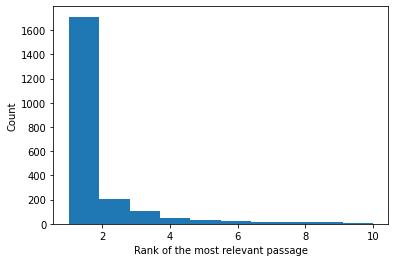

In [ ]:
evaluate_results(pred_para, gold_para)

### USING BM25

In [ ]:
! pip install rank_bm25

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rank_bm25 import BM25Okapi


In [ ]:
tokenized_para = [i.split(" ") for i in paras]

In [ ]:
# %%timeit
bm25 = BM25Okapi(tokenized_para)


In [ ]:
preds = []
# gold = []
for i in ques:
  tokenized_ques = i.split(" ")
  pred = bm25.get_top_n(tokenized_ques, paras, n = 20)
  pred = [paras.index(i) for i in pred]
  preds.append(pred)

Total queries: 2261
In top 20 results, number of queries for which -
	Relevant paragraph found: 1992 (88 %)
	Relevant paragraph NOT found: 269 (12 %)
Mean Rank for which relevant paragraph found: 2.28



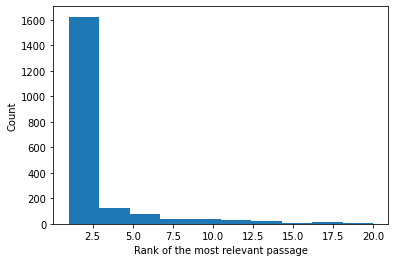

In [ ]:
evaluate_results(preds, gold_para)

Now applying FAISS to this, the final accuracy is bounded above by 0.88